In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [4]:
from fastai.conv_learner import *
from utils import *

In [5]:
print_info()

Last run on: 2018-02-16
PyTorch version: 0.3.1.post2
fastai version: 0.6


In [6]:
PATH = 'data/'
get_cifar10(PATH)

In [7]:
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
stats = (np.array([ 0.4914 ,  0.48216,  0.44653]), np.array([ 0.24703,  0.24349,  0.26159]))

In [8]:
def get_data(sz,bs):
    tfms = tfms_from_stats(stats, sz, aug_tfms=[RandomFlip()], pad=sz//8)
    return ImageClassifierData.from_paths(f'{PATH}cifar10/', val_name='test', tfms=tfms, bs=bs)

## Linear model

In [9]:
data = get_data(32, 128)

In [12]:
class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.ModuleList([nn.Linear(32*32*3, 1000), nn.Linear(1000, 10)])
        
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.layers[0](x)
        x = self.layers[1](x)
        return F.log_softmax(x)

In [10]:
batch = next(iter(data.trn_dl))

# m = LinearModel().cuda()

# m(V(batch[0]))

In [21]:
from IPython.core.debugger import set_trace

In [13]:
m = LinearModel()

In [24]:
p = list(m.parameters())

In [26]:
a = p[0]

In [29]:
type(a)

torch.nn.parameter.Parameter

In [31]:
learn = ConvLearner.from_model_data(m, data)

In [32]:
learn, [o.numel() for o in learn.model.parameters()]

(LinearModel(
   (layers): ModuleList(
     (0): Linear(in_features=3072, out_features=1000, bias=True)
     (1): Linear(in_features=1000, out_features=10, bias=True)
   )
 ), [3072000, 1000, 10000, 10])

In [33]:
learn.summary()

OrderedDict([('Linear-1',
              OrderedDict([('input_shape', [-1, 3072]),
                           ('output_shape', [-1, 1000]),
                           ('trainable', True),
                           ('nb_params', 3073000)])),
             ('Linear-2',
              OrderedDict([('input_shape', [-1, 1000]),
                           ('output_shape', [-1, 10]),
                           ('trainable', True),
                           ('nb_params', 10010)]))])

In [34]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 69%|██████▉   | 270/391 [00:20<00:08, 13.49it/s, loss=15]  

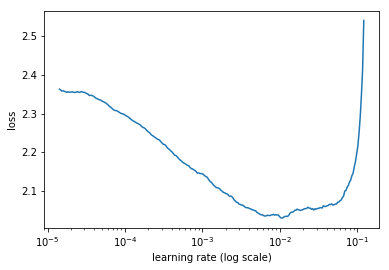

In [35]:
learn.sched.plot()

In [ ]:
learn.fit()

In [11]:
learn.opt_fn

<function fastai.core.SGD_Momentum.<locals>.<lambda>>